In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')



# Loading the Data 

In [2]:
df=pd.read_csv("audi.csv")
display(df)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


# Data Exploration or Data Study

In [3]:
print (len(df))

10668


In [4]:
display (df.shape)

(10668, 9)

In [5]:
display (df.dtypes )

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
display (df.isna().sum() )

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [8]:
display (df.describe ())

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Spliting the Data into Traget and Features 

In [9]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)


(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [10]:
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)


(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [11]:
display(pd.DataFrame(X).head(5))

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


## Data Tranformation 

In [12]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)


array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))


(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [14]:
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))


,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


# Train Test Split Data 

In [16]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)


(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


# Predictive Models 
1. RandomForest Regressor 
2. Linear Regression 
3. ExtraTressRegressor 
4. Cat Boost Regressor 
5. Gradient Boosting Regressor 
6. Gradiant Boosting Classifier 
7. XGBoost Regressor 

CAT Boost Regressor Outperforms all the predicitve models 

In [17]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

RandomForestRegressor(random_state=0)

In [18]:
y_pred = regression.predict(X_test)
display (y_pred)


array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


In [20]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
# print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.9536134841307546


In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg)

LinearRegression()


In [22]:
y_pred = reg.predict(X_test)
display (y_pred)


array([[13091.52500293],
       [29387.52500293],
       [31823.52500293],
       ...,
       [42695.52500293],
       [31583.52500293],
       [ 7311.52500293]])

In [23]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[13091.52500293 14998.        ]
 [29387.52500293 21950.        ]
 [31823.52500293 28990.        ]
 ...
 [42695.52500293 45995.        ]
 [31583.52500293 30500.        ]
 [ 7311.52500293  8400.        ]]


In [24]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.7915402594567064
Mean Absolute Error 3379.8051549247084


In [25]:
y_pred = reg.predict(X)
display (y_pred)


array([[14659.52500293],
       [20531.52500293],
       [13835.52500293],
       ...,
       [19443.52500293],
       [20907.52500293],
       [16735.52500293]])

In [26]:
result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14659.525003
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20531.525003
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13835.525003
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19807.525003
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17379.525003
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19219.525003
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19315.525003
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19443.525003
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20907.525003


In [27]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))


R2 Score  0.956639120782646
Mean Absolute Error 1532.583951239196


In [28]:
y_pred = reg.predict(X)
display (y_pred)
result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)


array([[14659.52500293],
       [20531.52500293],
       [13835.52500293],
       ...,
       [19443.52500293],
       [20907.52500293],
       [16735.52500293]])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14659.525003
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20531.525003
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13835.525003
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19807.525003
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17379.525003
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19219.525003
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19315.525003
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19443.525003
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20907.525003


In [29]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = 1)



In [30]:
display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [31]:
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([14076.83112918, 23672.68044652, 28467.99887709, ...,
       48047.21123319, 31275.14653068, 10042.4909176 ])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))


MAE 1501.5638090831385
MSE 5652989.592030134


In [33]:
display (r2_score(Y_test,rf_pred))

0.9588622206320067

In [34]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))


Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 151ms	remaining: 2m 31s
1:	learn: 10690.2138498	total: 154ms	remaining: 1m 16s
2:	learn: 10221.1011877	total: 157ms	remaining: 52s
3:	learn: 9778.8067263	total: 159ms	remaining: 39.6s
4:	learn: 9382.6454054	total: 161ms	remaining: 32.1s
5:	learn: 8989.9290587	total: 163ms	remaining: 27s
6:	learn: 8628.4892653	total: 165ms	remaining: 23.4s
7:	learn: 8280.9179062	total: 167ms	remaining: 20.7s
8:	learn: 7950.5476053	total: 169ms	remaining: 18.7s
9:	learn: 7636.7735365	total: 172ms	remaining: 17s
10:	learn: 7349.6084699	total: 174ms	remaining: 15.6s
11:	learn: 7084.0457263	total: 176ms	remaining: 14.5s
12:	learn: 6842.7060927	total: 179ms	remaining: 13.6s
13:	learn: 6608.0244743	total: 181ms	remaining: 12.8s
14:	learn: 6387.7285726	total: 184ms	remaining: 12.1s
15:	learn: 6170.1354894	total: 186ms	remaining: 11.4s
16:	learn: 5973.9133066	total: 188ms	remaining: 10.9s
17:	learn: 5780.4713044	total: 190ms	remaining: 10.4s
18:	learn

217:	learn: 2321.4407108	total: 577ms	remaining: 2.07s
218:	learn: 2319.8959026	total: 580ms	remaining: 2.07s
219:	learn: 2317.2280690	total: 582ms	remaining: 2.06s
220:	learn: 2316.4073503	total: 584ms	remaining: 2.06s
221:	learn: 2315.9774014	total: 587ms	remaining: 2.06s
222:	learn: 2313.4353035	total: 589ms	remaining: 2.05s
223:	learn: 2309.5002690	total: 591ms	remaining: 2.05s
224:	learn: 2308.6886023	total: 593ms	remaining: 2.04s
225:	learn: 2304.9689724	total: 595ms	remaining: 2.04s
226:	learn: 2303.2677276	total: 597ms	remaining: 2.03s
227:	learn: 2302.0813332	total: 599ms	remaining: 2.03s
228:	learn: 2299.7896009	total: 600ms	remaining: 2.02s
229:	learn: 2298.6975801	total: 602ms	remaining: 2.02s
230:	learn: 2295.4513799	total: 604ms	remaining: 2.01s
231:	learn: 2294.8327851	total: 606ms	remaining: 2.01s
232:	learn: 2292.7337022	total: 608ms	remaining: 2s
233:	learn: 2291.3686155	total: 610ms	remaining: 2s
234:	learn: 2289.8722686	total: 612ms	remaining: 1.99s
235:	learn: 2287

413:	learn: 2073.7485263	total: 961ms	remaining: 1.36s
414:	learn: 2073.2672776	total: 963ms	remaining: 1.36s
415:	learn: 2072.5119144	total: 965ms	remaining: 1.35s
416:	learn: 2071.2966911	total: 967ms	remaining: 1.35s
417:	learn: 2070.9719841	total: 969ms	remaining: 1.35s
418:	learn: 2069.6649051	total: 971ms	remaining: 1.35s
419:	learn: 2069.2530742	total: 986ms	remaining: 1.36s
420:	learn: 2067.8643085	total: 989ms	remaining: 1.36s
421:	learn: 2067.1527675	total: 992ms	remaining: 1.36s
422:	learn: 2066.9025605	total: 995ms	remaining: 1.36s
423:	learn: 2065.6107786	total: 997ms	remaining: 1.35s
424:	learn: 2064.5494343	total: 999ms	remaining: 1.35s
425:	learn: 2064.1986889	total: 1s	remaining: 1.35s
426:	learn: 2063.4126644	total: 1s	remaining: 1.34s
427:	learn: 2062.3657353	total: 1s	remaining: 1.34s
428:	learn: 2061.1856541	total: 1.01s	remaining: 1.34s
429:	learn: 2060.0766706	total: 1.01s	remaining: 1.34s
430:	learn: 2059.6011787	total: 1.01s	remaining: 1.33s
431:	learn: 2058.69

612:	learn: 1938.1051539	total: 1.35s	remaining: 851ms
613:	learn: 1937.2394544	total: 1.35s	remaining: 849ms
614:	learn: 1936.8663732	total: 1.35s	remaining: 846ms
615:	learn: 1936.4281529	total: 1.35s	remaining: 844ms
616:	learn: 1936.0937120	total: 1.35s	remaining: 841ms
617:	learn: 1935.7719810	total: 1.36s	remaining: 839ms
618:	learn: 1935.2913645	total: 1.36s	remaining: 838ms
619:	learn: 1934.4904903	total: 1.36s	remaining: 836ms
620:	learn: 1934.1800849	total: 1.37s	remaining: 834ms
621:	learn: 1933.4538768	total: 1.37s	remaining: 832ms
622:	learn: 1933.0993932	total: 1.37s	remaining: 829ms
623:	learn: 1932.6865162	total: 1.37s	remaining: 827ms
624:	learn: 1931.9273461	total: 1.37s	remaining: 825ms
625:	learn: 1931.2822183	total: 1.38s	remaining: 823ms
626:	learn: 1930.4819312	total: 1.38s	remaining: 820ms
627:	learn: 1929.8859706	total: 1.38s	remaining: 818ms
628:	learn: 1929.5041891	total: 1.38s	remaining: 816ms
629:	learn: 1929.3558970	total: 1.38s	remaining: 813ms
630:	learn

814:	learn: 1840.0460492	total: 1.75s	remaining: 396ms
815:	learn: 1839.7358153	total: 1.75s	remaining: 394ms
816:	learn: 1839.1758207	total: 1.75s	remaining: 392ms
817:	learn: 1838.7747853	total: 1.75s	remaining: 390ms
818:	learn: 1838.6663974	total: 1.75s	remaining: 388ms
819:	learn: 1838.1439184	total: 1.76s	remaining: 386ms
820:	learn: 1837.8198129	total: 1.76s	remaining: 384ms
821:	learn: 1836.9727506	total: 1.76s	remaining: 382ms
822:	learn: 1836.6343852	total: 1.76s	remaining: 379ms
823:	learn: 1836.2584488	total: 1.76s	remaining: 377ms
824:	learn: 1836.2507165	total: 1.77s	remaining: 375ms
825:	learn: 1835.8576619	total: 1.77s	remaining: 373ms
826:	learn: 1835.6178868	total: 1.77s	remaining: 371ms
827:	learn: 1835.4892071	total: 1.77s	remaining: 369ms
828:	learn: 1835.1629321	total: 1.78s	remaining: 366ms
829:	learn: 1834.9497893	total: 1.78s	remaining: 364ms
830:	learn: 1834.5549875	total: 1.78s	remaining: 362ms
831:	learn: 1834.0988549	total: 1.78s	remaining: 360ms
832:	learn

In [36]:
cat_pred=cat.predict(X_test)
display (cat_pred)


array([13386.63817795, 24056.86842882, 28082.99514751, ...,
       45959.31234642, 31714.44751009,  9481.45994163])

In [37]:
display (r2_score(Y_test,cat_pred))

0.9641612028134969

In [38]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))


In [39]:
model=pickle.load(open('model.pkl','rb'))
print (model.predict (X_train))


[14256.69390956 29475.32741129 11911.12888914 ... 21406.16876331
 17189.65426694 44839.56117235]


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [41]:
gbr_pred = model.predict(X_test)

In [42]:
display (r2_score(Y_test,gbr_pred))

0.9469985268893737

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

gbc_pred = model.predict(X_test)
display (r2_score(Y_test,gbc_pred))

0.9470345344560149

In [44]:

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import cross_val_score

# create an xgboost regression model
model = XGBRegressor()

...
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 1495.963 (40.560)


In [45]:
model.fit(
    X_train, 
    Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
xgb_pred = model.predict(X_test)
display (r2_score(Y_test,xgb_pred))

0.962271729600685

### Feature Importance Graph 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

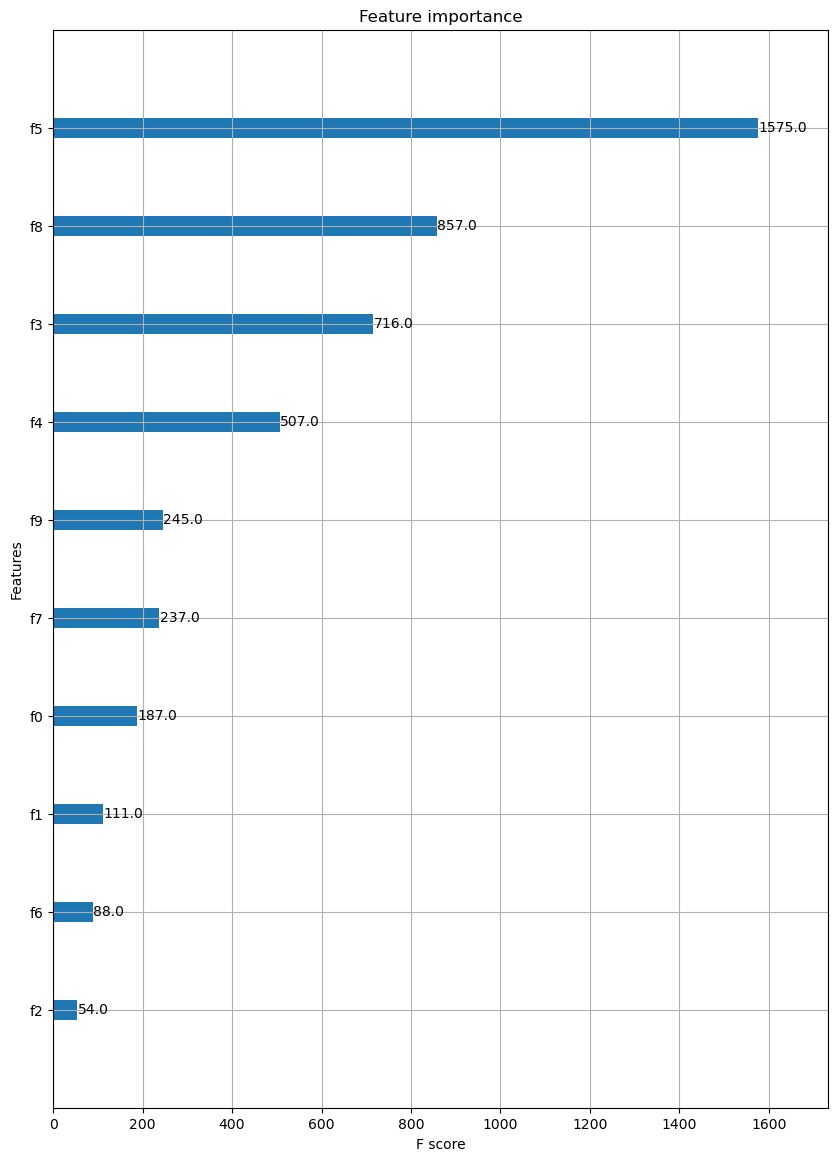

In [47]:
# Plot feature importance
from xgboost import plot_importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)
plot_features(model, (10,14))